<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/adiyasan/pembelajaranmesinlanjut/price_regression.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/adiyasan/pembelajaranmesinlanjut/price_regression.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information

In [ ]:
# Copyright 2022 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

# 2. Boston Housing Price Prediction

Dalam tugas ini, saya akan membangun dan melatih sebuah deep neural network (DNN) untuk masalah regresi yaitu prediksi harga dengan menggunakan dataset boston housing price [BOSTON](https://keras.io/api/datasets/boston_housing/). Dataset berisi 13 atribut rumah di lokasi yang berbeda di sekitar pinggiran kota Boston pada akhir 1970-an. Target adalah nilai median rumah di suatu lokasi (dalam k$).

In [181]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

## 2.1 Boston Housing Price dataset 

Mari kita download dan load dataset, melakukan scaling dengan MinMaxScaler agar distribusi data traing dan test sesuai min-max nya, dan display sedikit sampel darinya:

In [182]:
boston = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

# apply min-max scaling
mms = MinMaxScaler()
mms.fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

Mari visualisasikan beberapa data tersebut dan label yang bersesuaian dengannya.

In [183]:
print('sample data train',x_train[0])
print('sample label train',y_train[0])
print('sample data test',x_test[0])
print('sample label test',y_test[0])

sample data train [0.01378163 0.         0.28152493 0.         0.31481481 0.49980635
 0.91452111 0.29719123 0.13043478 0.22753346 0.89361702 1.
 0.46881898]
sample label train 15.2
sample data test [0.20319551 0.         0.64662757 0.         0.60493827 0.55635167
 1.         0.07359588 1.         0.91395793 0.80851064 0.06790559
 0.75386313]
sample label test 7.2


## 2.2 Deep Neural Network untuk Regresi

Pertama-tama kita akan membangun sebuah jaringan syaraf sederhana yang terdiri dari 2 lapisan fully connected dan mengaplikasikan ini pada tugas regresi. Template sourcecode kami rujuk ke link Github berikut:
https://github.com/emresancakli4/boston-housing-price-prediction/blob/main/boston.py

Arsitektur yang kami bangun digambarkan dibawah ini:

![alt_text](https://miro.medium.com/max/1400/1*7QLY0hczo9dtE9E77NYACw.jpeg "DNN Architecture for Regression")


### Arsitektur jaringan syaraf fully connected
Untuk menentukan arsitektur jaringan saraf fully connected ini, kami akan sekali lagi menggunakan Keras API dan menentukan model menggunakan kelas [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential). Pertama-tama kami menggunakan sebuah lapisan [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), yang meratakan input sehingga dapat dimasukkan ke dalam model.

In [204]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(100, input_dim=13, activation=tf.nn.relu),
      # tf.keras.layers.Dense(128, activation= '''TODO'''),
      # note: https://keras.io/api/layers/activations/ relu,sigmoid,softmax,softplus,softsign,tanh,selu,elu,exponential
      
      tf.keras.layers.Dense(100, activation=tf.nn.relu),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(1, activation='linear') 
      # [TODO Dense layer to output classification probabilities]
      
  ])
  return fc_model

model = build_fc_model()

Input lapisan hidden pertama adalah 13 neuron yang merupakan fitur dari data. Lapisan output adalah satu neuron dengan fungsi aktivasi Linear yang merepresentasikan hasil prediksi dari model  



### Mengkompilasi model

Sebelum melatih model, kita perlu mendefinisikan beberapa pengaturan lagi. Ini ditambahkan selama langkap kompilasi model [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) :

* *Loss function* — Ini menentukan bagaimana kami mengukur seberapa akurat model selama pelatihan. Seperti yang dibahas dalam kuliah, selama pelatihan kami ingin meminimalkan fungsi ini, yang akan "mengarahkan" model ke arah yang benar.
* *Optimizer* — Ini mendefinisikan bagaimana model diperbarui berdasarkan data yang dilihatnya dan fungsi kerugiannya.
* *Metrics* — Di sini kita dapat menentukan metrik yang digunakan untuk memantau langkah-langkah pelatihan dan pengujian. Dalam tugas ini digunakan *mse* yang merupakan nilai error yang dihasilkan ketika prediksi.

Kita akan memulai dengan menggunakan pengoptimal RMSprop. Fungsi loss yang digunakan untuk regresi ini adalah mse.

In [205]:
'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2), 
              loss='mse',
              metrics=['mae'])

### Melatih model

Sekarang siap untuk melatih model, yang akan melibatkan memasukkan data pelatihan (`x_train` dan `y_train`) ke dalam model, dan kemudian memintanya untuk mempelajari hubungan antara data dan label. Kita juga perlu menentukan ukuran batch dan jumlah epoch untuk digunakan selama pelatihan.

Setelah menentukan setelan model pada langkah `compile`, kita juga dapat menyelesaikan pelatihan dengan memanggil metod [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) pada instance kelas `Model`. Kami akan menggunakan ini untuk melatih model fully connected kami

Epoch 1/500
11/11 [==============================] - 1s 21ms/step - loss: 206.0961 - mae: 10.9084 - val_loss: 78.2462 - val_mae: 7.3625
Epoch 2/500
11/11 [==============================] - 0s 8ms/step - loss: 63.8640 - mae: 5.7434 - val_loss: 96.4413 - val_mae: 7.0802
Epoch 3/500
11/11 [==============================] - 0s 8ms/step - loss: 61.6210 - mae: 5.6366 - val_loss: 43.1764 - val_mae: 4.4065
Epoch 4/500
11/11 [==============================] - 0s 10ms/step - loss: 48.5395 - mae: 4.9742 - val_loss: 98.9749 - val_mae: 8.8892
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 47.3597 - mae: 4.8334 - val_loss: 30.6577 - val_mae: 3.8402
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 32.3313 - mae: 4.0343 - val_loss: 46.5739 - val_mae: 5.0305
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 39.0793 - mae: 4.7254 - val_loss: 136.3290 - val_mae: 10.7442
Epoch 8/500
11/11 [==============================] - 0s 9ms/ste

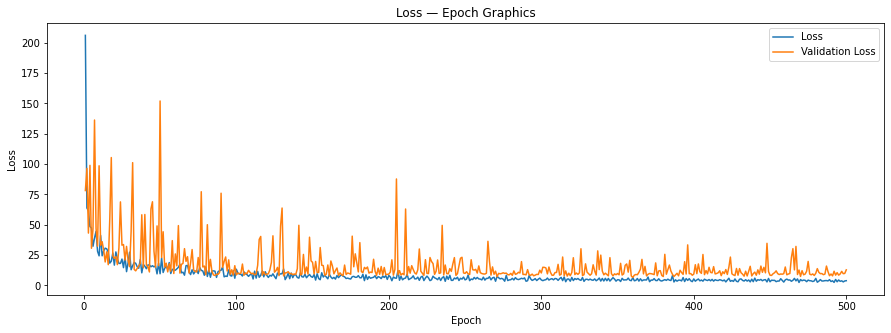

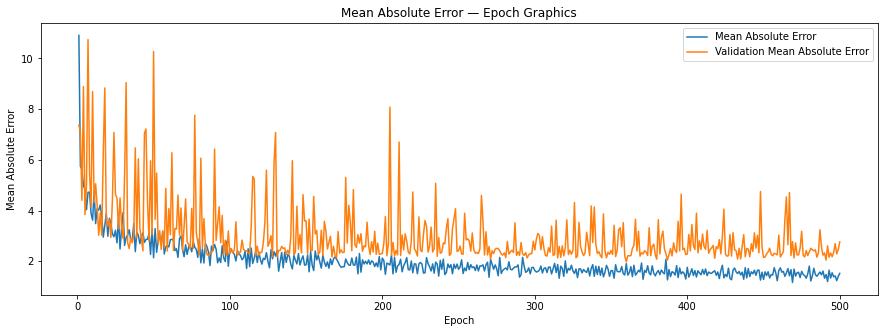

In [206]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2)

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

### Evaluasi pada dataset test

Sekarang setelah kita melatih modelnya, kita dapat memintanya untuk membuat prediksi tentang set pengujian yang belum pernah dilihat sebelumnya. Dalam contoh ini, larik `x_test` terdiri dari kumpulan data pengujian. Untuk mengevaluasinya, kita dapat memeriksa nilai Mean Absolute Error prediksi model dengan label dari larik `y_test`.

Gunakan metode [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) untuk mengevaluasi model pada kumpulan data pengujian

In [207]:
result = model.evaluate(x_test, y_test)

for i in range(len(result)):
    print(f'{model.metrics_names[i]} — -> {result[i]}')

4/4 [==============================] - 0s 4ms/step - loss: 21.2495 - mae: 3.3941
loss — -> 21.24953842163086
mae — -> 3.3941261768341064


### Evaluasi akurasi dengan data yang benar-benar baru

Sekarang kita coba membuat prediksi dengan model menggunakan data yang benar-benar baru, tidak ada dalam dataset test. 

In [208]:
predict_data = np.array([0.63796, 0.00, 8.140, 0, 0.5380, 6.0960, 84.50, 4.4619, 4, 307.0, 21.00, 380.02, 10.26])
predict_data = mms.transform(predict_data.reshape(1, -1))
predict_result = model.predict(predict_data)
print(f'Predicted result: {predict_result[0, 0]}')

Predicted result: 17.518230438232422


## 2.3 Kesimpulan

Model yang dibangun dalam experiment terbukti handal untuk menyelesaikan masalah regresi harga rumah dalam dataset Boston Housing Price. Setting hyperparameter telah mendapatkan kesimpulan bahwa parameter-parameter berikut adalah best parameter :
<table>
<thead>
  <tr>
    <td><strong>Parameter</strong></td>
    <td><strong>Value</strong></td>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Jml. Hidden Layer</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Jml. Neuron di Tiap Hidden Layer</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Fungsi Aktivasi di Tiap Hidden Layer</td>
    <td>ReLU</td>
  </tr>
  <tr>
    <td>Optimizer</td>
    <td>RMSprop</td>
  </tr>
  <tr>
    <td>Learning Rate</td>
    <td>0.01</td>
  </tr>
  <tr>
    <td>Loss Function</td>
    <td>MSE</td>
  </tr>
  <tr>
    <td>Epoch</td>
    <td>500</td>
  </tr>
</tbody>
</table>